In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import requests
import plotly.io as pio

C:\Users\sergi\AppData\Local\Temp\ipykernel_3632\1211356572.py:15: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>
  plt.locator_params(axis='x', nbins=num_ticks)


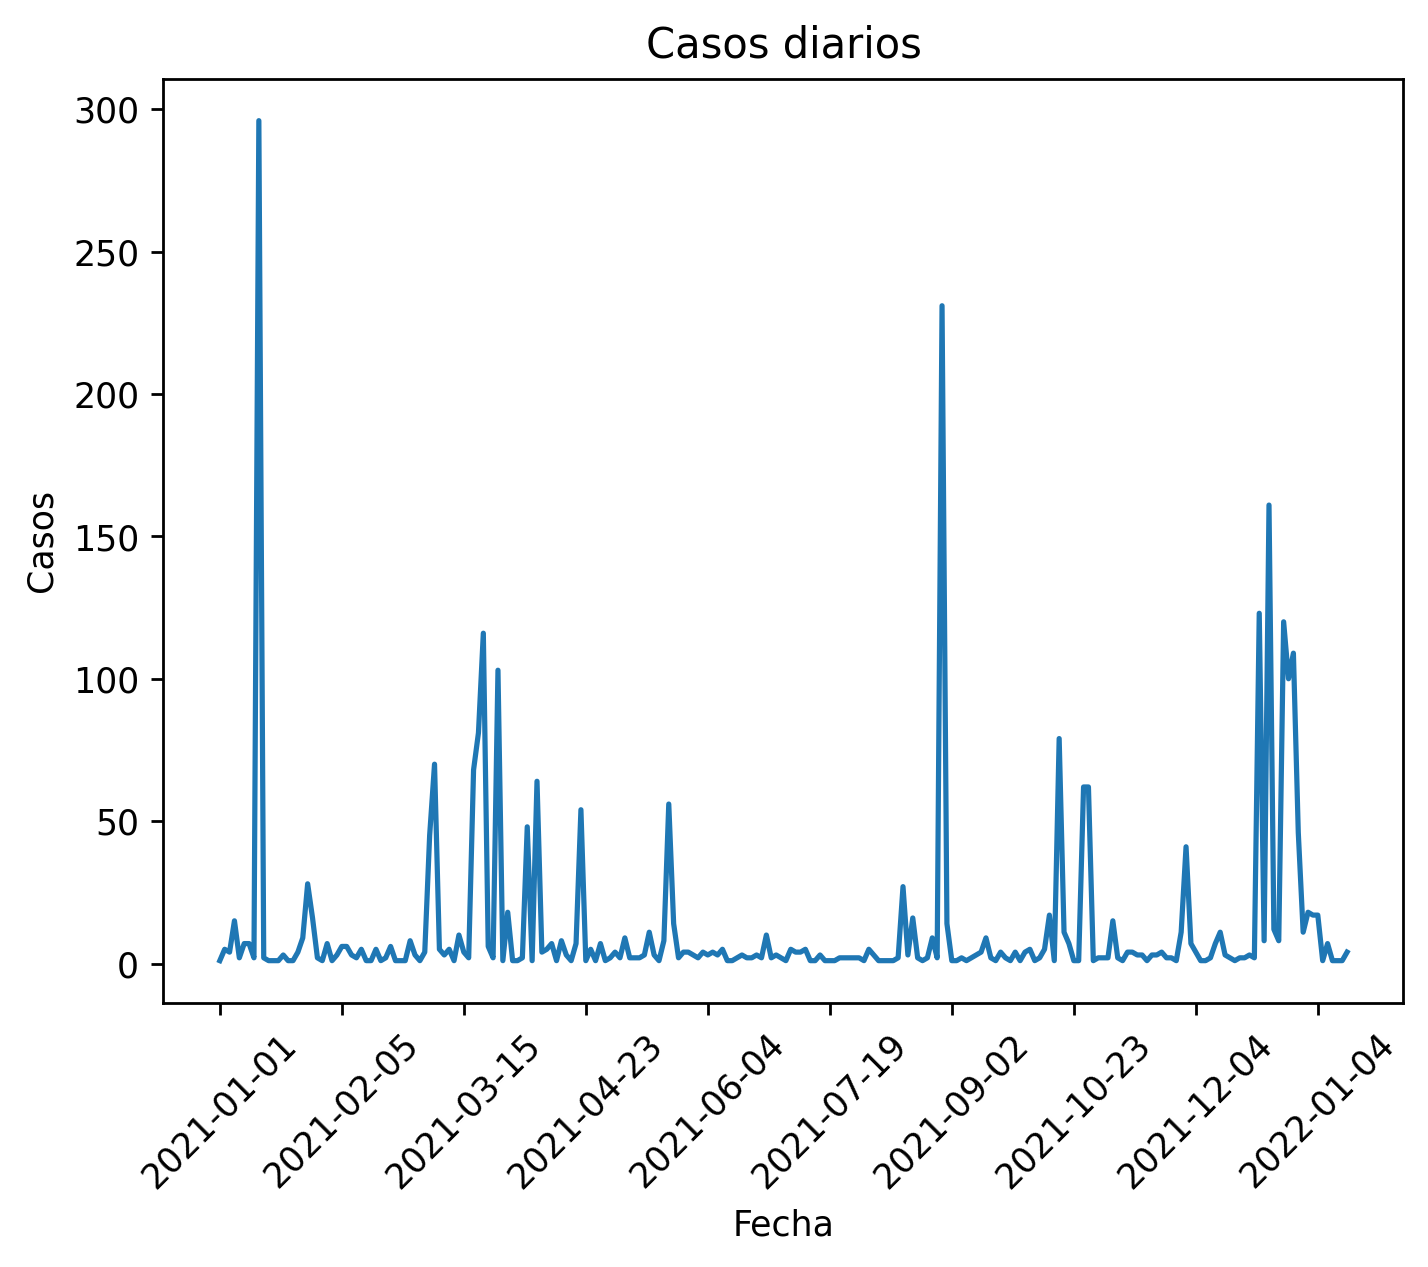

In [6]:
data = pd.read_csv('Tablas a graficar/casos_diarios.csv')

plt.figure(dpi=250)

x = data.iloc[:, 0]
y = data.iloc[:, 1]

plt.plot(x, y)
plt.xlabel('Fecha')
plt.ylabel('Casos')
plt.title('Casos diarios')

# Set the desired number of ticks on the X-axis
num_ticks = 9
plt.locator_params(axis='x', nbins=num_ticks)

# Show only a subset of tick labels
x_labels = plt.gca().get_xticks()
step = len(x_labels) // num_ticks
plt.xticks(x_labels[::step], rotation=45)

plt.show()

C:\Users\sergi\AppData\Local\Temp\ipykernel_3632\2877893356.py:15: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>
  plt.locator_params(axis='x', nbins=num_ticks)


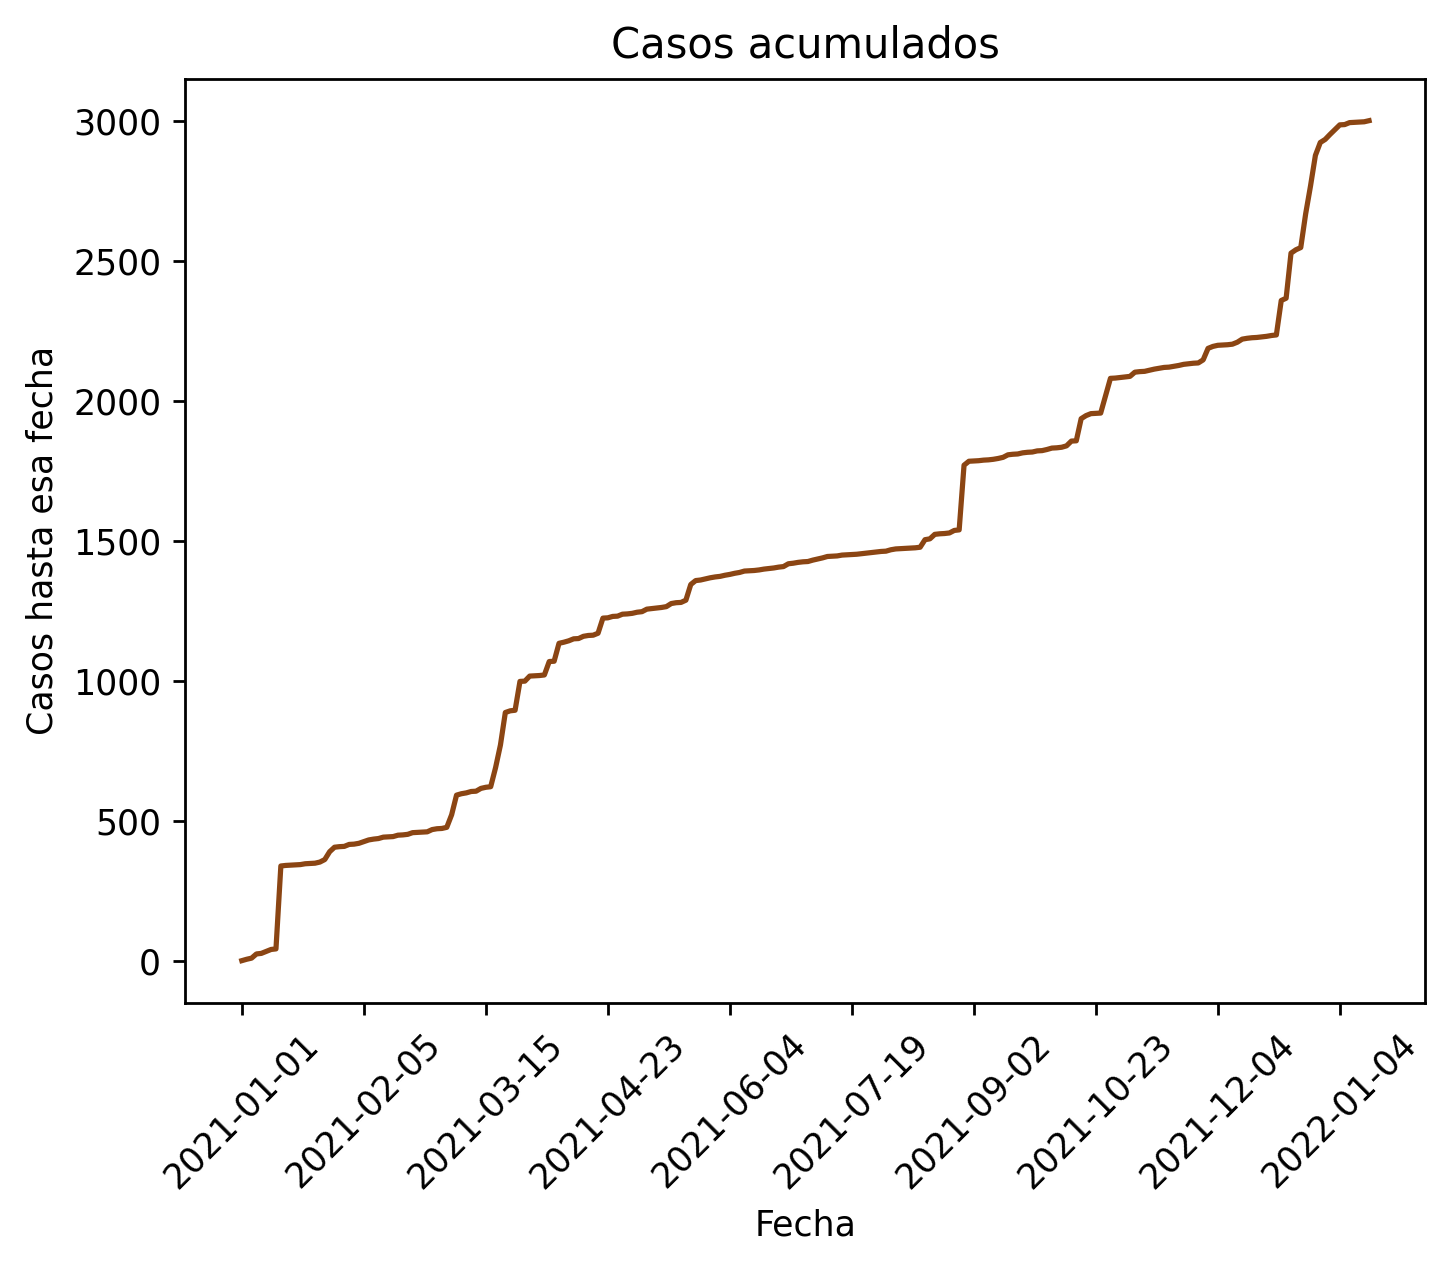

In [8]:
data = pd.read_csv('Tablas a graficar/casos_acumulados.csv')

plt.figure(dpi=250)

x = data.iloc[:, 0]
y = data.iloc[:, 1]

plt.plot(x, y, color='saddlebrown')
plt.xlabel('Fecha')
plt.ylabel('Casos hasta esa fecha')
plt.title('Casos acumulados')

# Set the desired number of ticks on the X-axis
num_ticks = 9
plt.locator_params(axis='x', nbins=num_ticks)

# Show only a subset of tick labels
x_labels = plt.gca().get_xticks()
step = len(x_labels) // num_ticks
plt.xticks(x_labels[::step], rotation=45)

plt.show()

C:\Users\sergi\AppData\Local\Temp\ipykernel_3632\2356365331.py:15: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>
  plt.locator_params(axis='x', nbins=num_ticks)


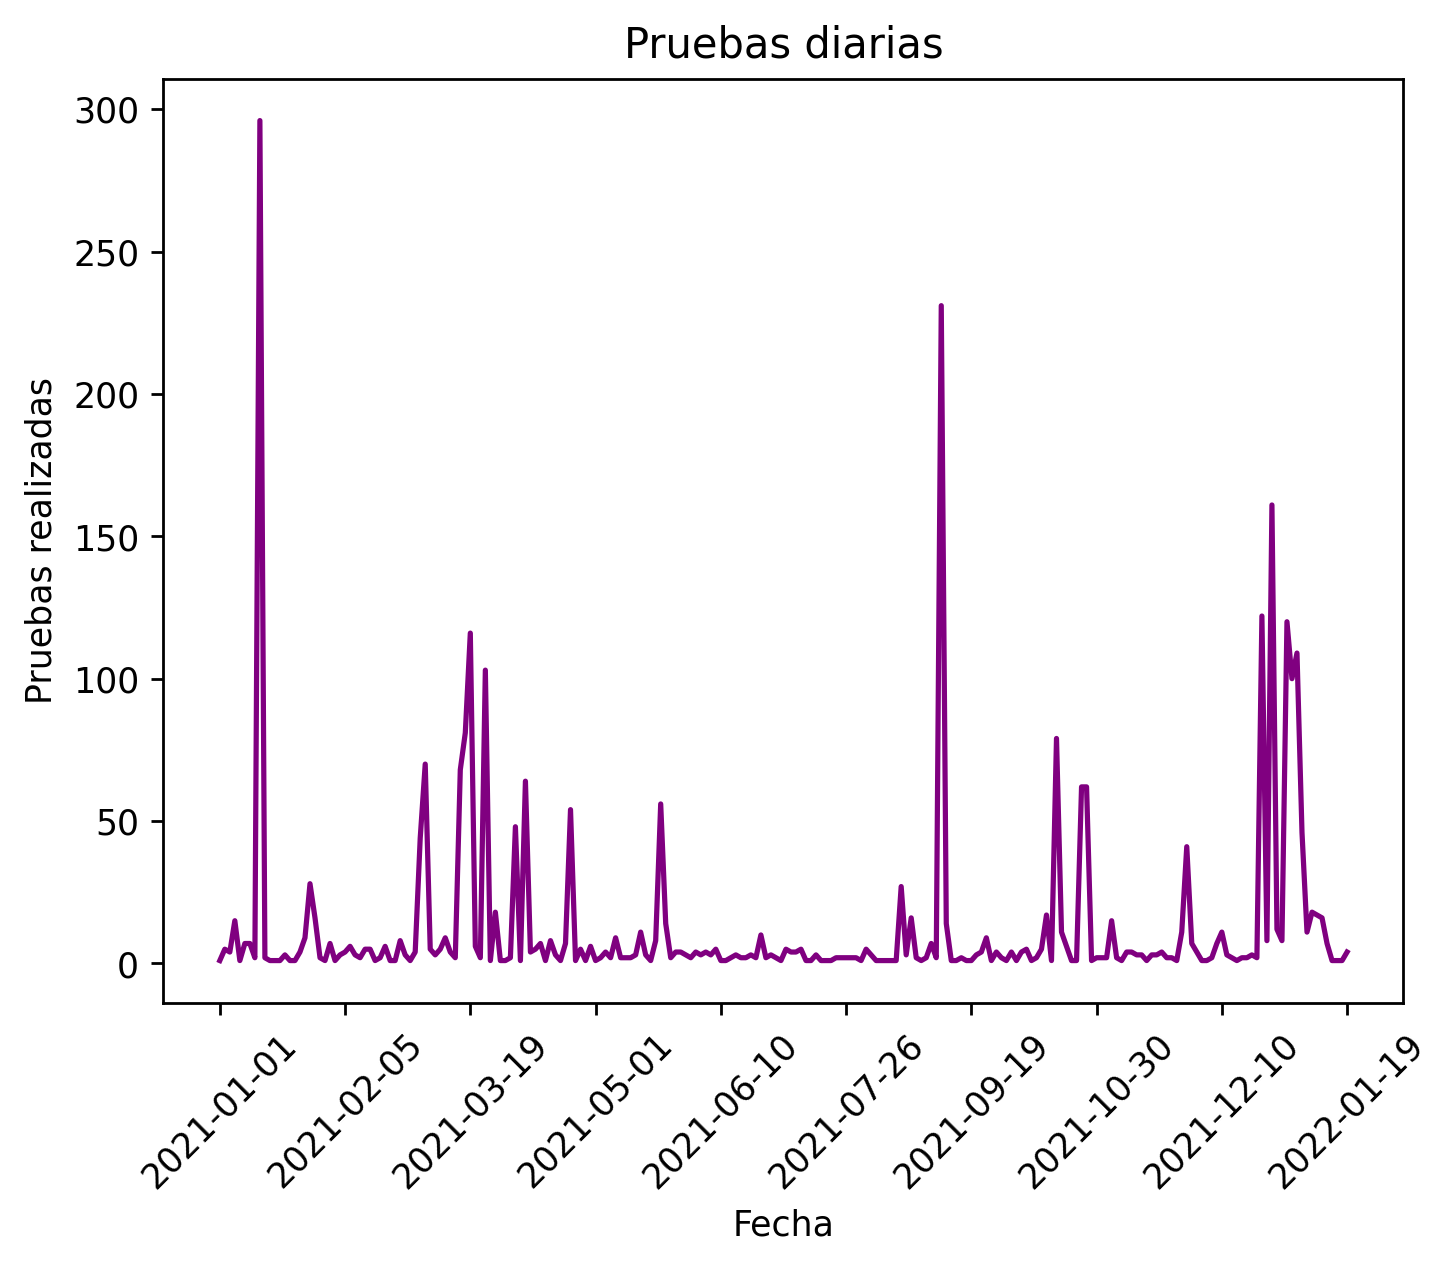

In [9]:
data = pd.read_csv('Tablas a graficar/pruebas_diarias.csv')

plt.figure(dpi=250)

x = data.iloc[:, 0]
y = data.iloc[:, 1]

plt.plot(x, y, color='purple')
plt.xlabel('Fecha')
plt.ylabel('Pruebas realizadas')
plt.title('Pruebas diarias')

# Set the desired number of ticks on the X-axis
num_ticks = 9
plt.locator_params(axis='x', nbins=num_ticks)

# Show only a subset of tick labels
x_labels = plt.gca().get_xticks()
step = len(x_labels) // num_ticks
plt.xticks(x_labels[::step], rotation=45)

plt.show()

C:\Users\sergi\AppData\Local\Temp\ipykernel_3632\1368312273.py:15: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>
  plt.locator_params(axis='x', nbins=num_ticks)


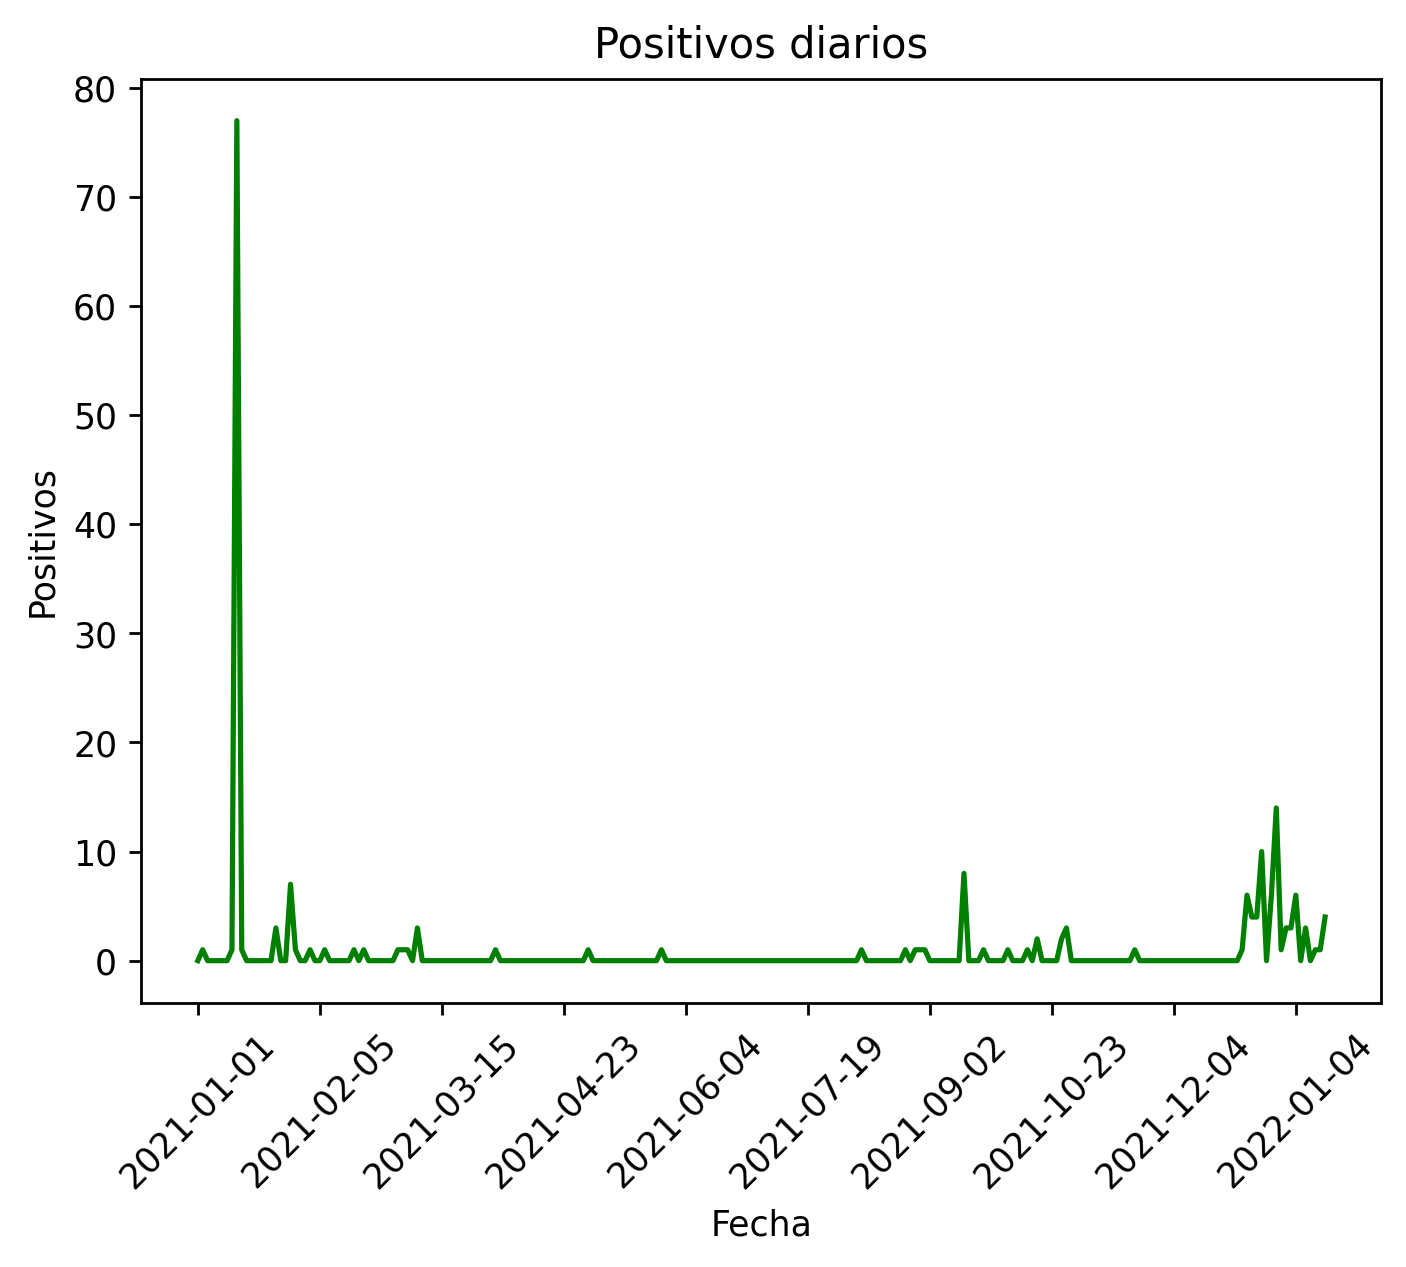

In [10]:
data = pd.read_csv('Tablas a graficar/positivos_diarios.csv')

plt.figure(dpi=250)

x = data.iloc[:, 0]
y = data.iloc[:, 1]

plt.plot(x, y, color='green')
plt.xlabel('Fecha')
plt.ylabel('Positivos')
plt.title('Positivos diarios')

# Set the desired number of ticks on the X-axis
num_ticks = 9
plt.locator_params(axis='x', nbins=num_ticks)

# Show only a subset of tick labels
x_labels = plt.gca().get_xticks()
step = len(x_labels) // num_ticks
plt.xticks(x_labels[::step], rotation=45)

plt.show()

In [70]:
df=pd.read_csv('Tablas a graficar/casos_entidad.csv')
repo_url = 'https://raw.githubusercontent.com/angelnmara/geojson/master/mexicoHigh.json' #Archivo GeoJSON
mx_regions_geo = requests.get(repo_url).json()

fig = px.choropleth(data_frame=df, 
                    geojson=mx_regions_geo, 
                    locations='entidad_res', # nombre de la columna del Dataframe
                    featureidkey='properties.name',  # ruta al campo del archivo GeoJSON con el que se hará la relación (nombre de los estados)
                    color='Casos', #El color depende de las cantidades
                    color_continuous_scale="burg",
                    custom_data=['entidad_res', 'Casos']
                   )
fig.update_geos(showcountries=True, showcoastlines=True, showland=True, fitbounds="locations")
fig.update_traces(hovertemplate='<b>%{customdata[0]}</b><br>Casos: %{customdata[1]}')

fig.update_layout(
    title_text = 'Casos de infección en México',
    font=dict(
        #family="Courier New, monospace",
        family="Ubuntu",
        size=18,
        color="#7f7f7f"
    ),
    annotations = [dict(
        x=0.55,
        y=-0.1,
        xref='paper',
        yref='paper',
        text='',
        showarrow = False
    )]
)

fig.show()

In [ ]:
pio.write_html(fig, file='casos_entidad.html', auto_open=True)  # Para guardar el mapa en html

<Figure size 640x480 with 0 Axes>

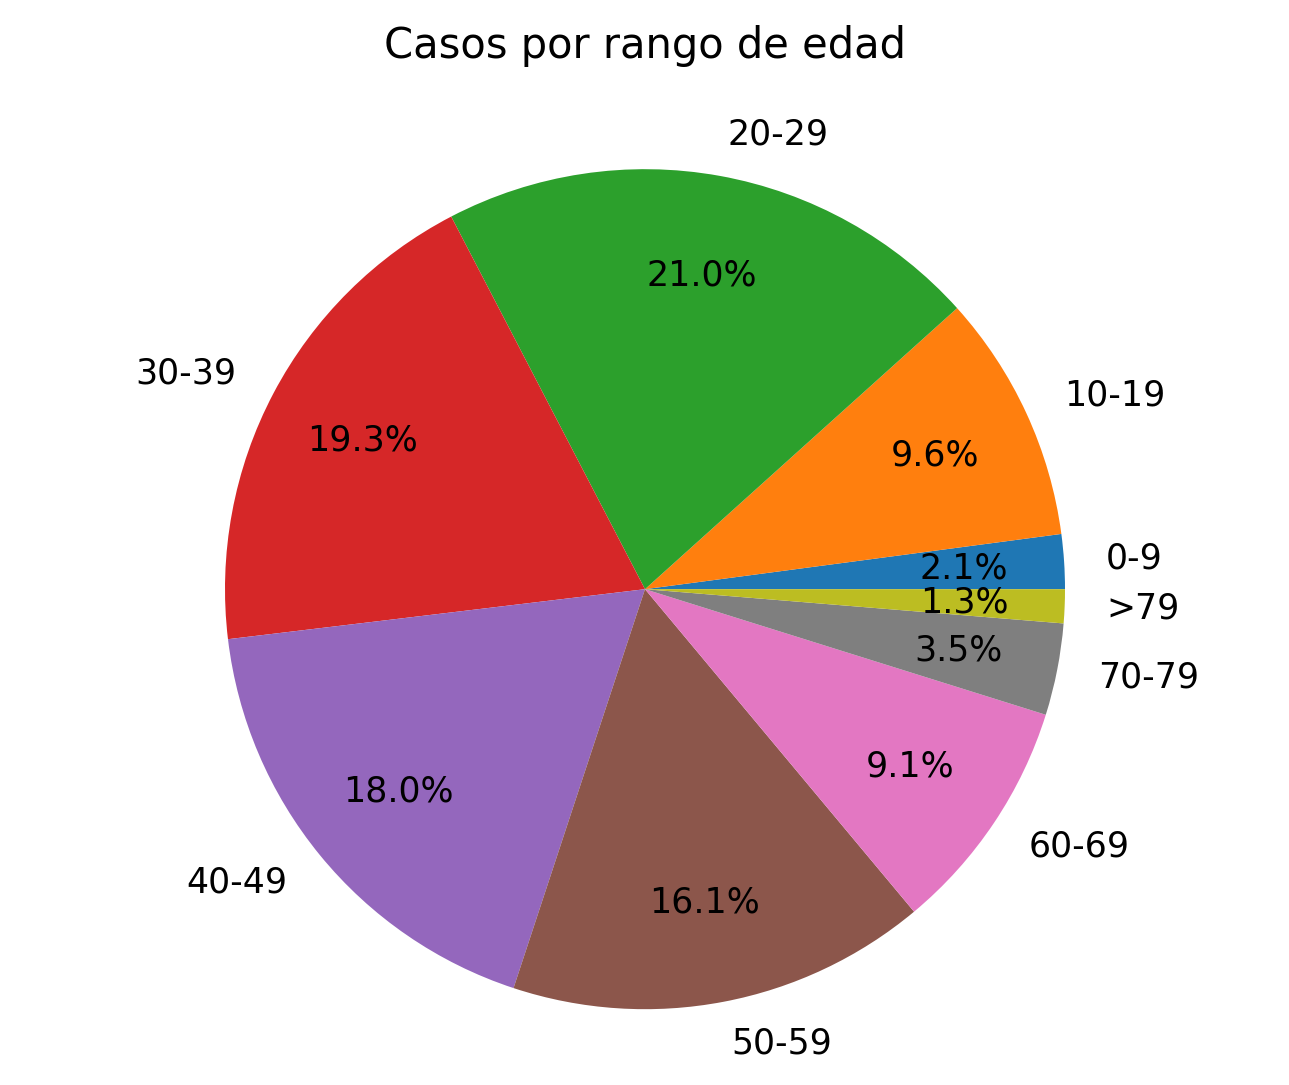

In [12]:
data = pd.read_csv('Tablas a graficar/casos_edad.csv')

plt.figure()
plt.rcParams.update({})
plt.figure(dpi=250)
plt.pie(data['Casos'], labels=data['grupo_edad'], autopct='%1.1f%%', pctdistance=0.76)
plt.title('Casos por rango de edad', pad=20)
plt.axis('equal')
plt.show()

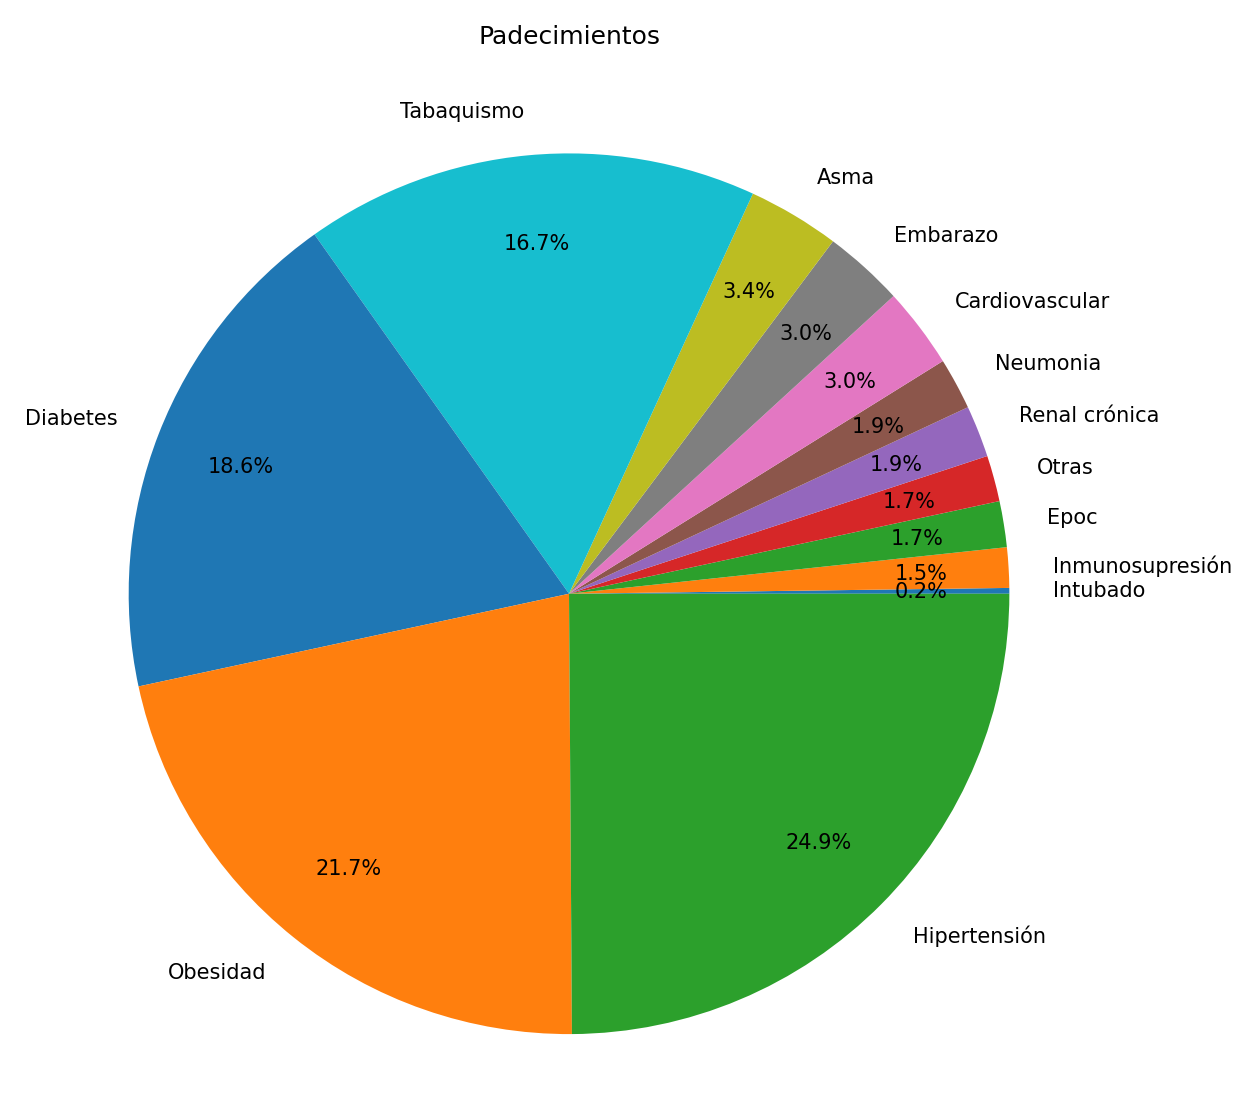

In [4]:
data = pd.read_csv('Tablas a graficar/padecimientos.csv')
data = data[data['Casos'] != 0]

plt.figure(figsize=(5, 5), dpi=250)
plt.rcParams['font.size'] = 6
plt.pie(data['Casos'], labels=data['Padecimiento'], autopct='%1.1f%%', pctdistance=0.8)
plt.title('Padecimientos', pad=20)
plt.axis('equal')
plt.show()

<Figure size 640x480 with 0 Axes>

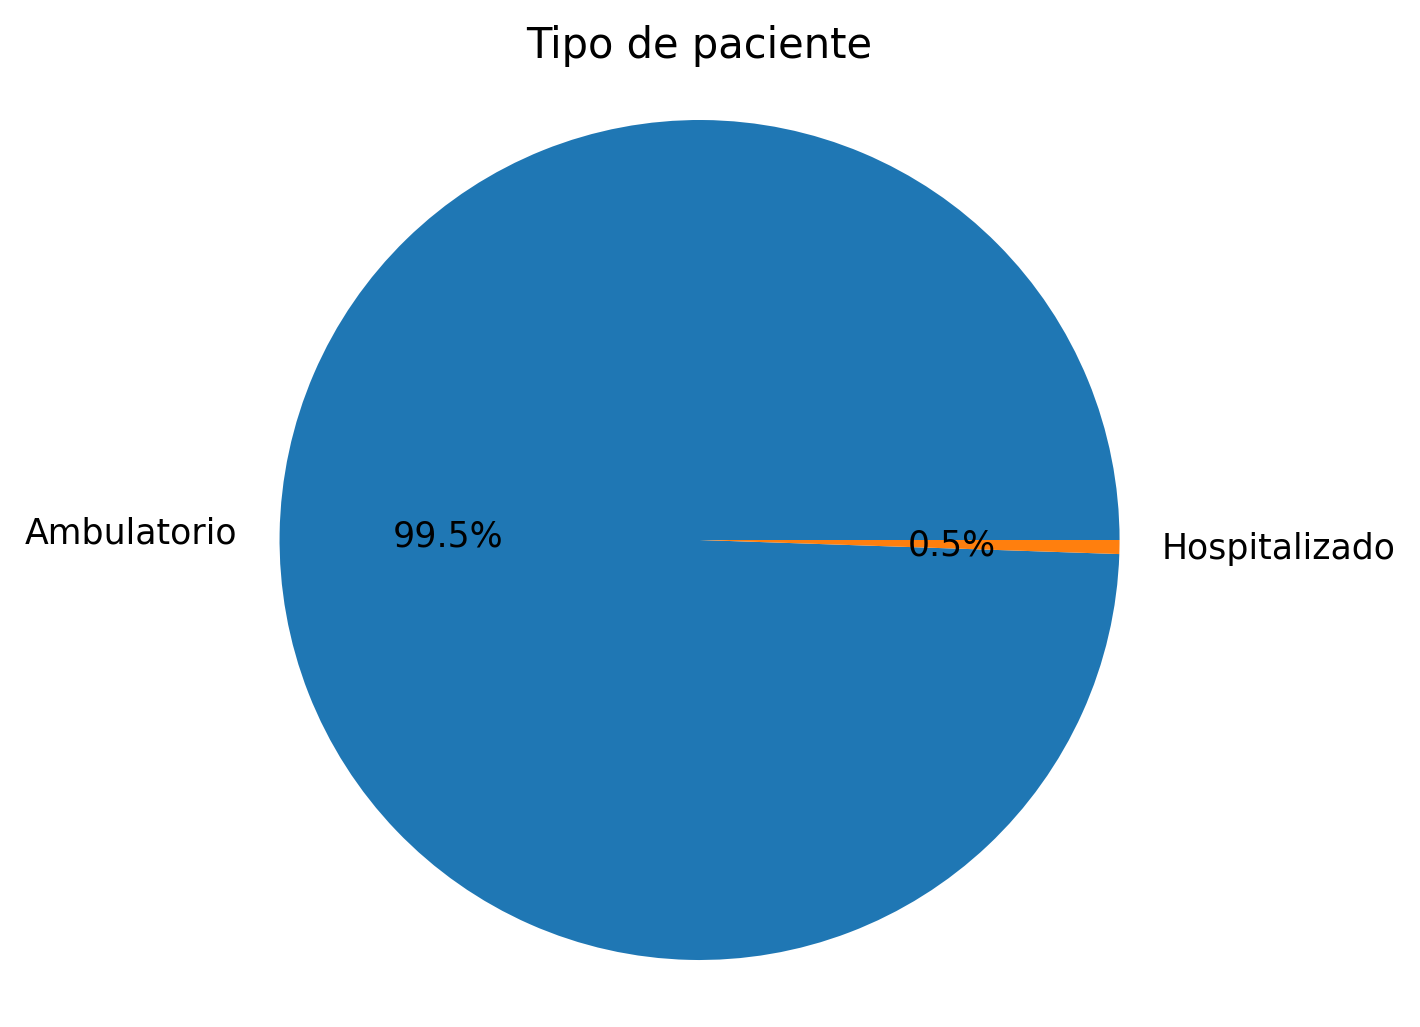

In [13]:
data = pd.read_csv('Tablas a graficar/hospitalizados.csv')

plt.figure()
plt.rcParams.update({})
plt.figure(dpi=250)
plt.pie(data['Casos'], labels=data['tipo_paciente'], autopct='%1.1f%%')
plt.title('Tipo de paciente')
plt.axis('equal')
plt.show()